In [2]:
import sys; sys.path.insert(0, '../../');
from methods.config import *
import numpy as np; rnd=np.random.default_rng()
import matplotlib.pyplot as plt; import matplotlib as mpl
import methods.util as util
import pickle
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import methods.shared as shared

from importlib import reload
reload(shared)
reload(util);
from matplotlib.backends.backend_pdf import PdfPages

import scipy.stats
import pandas as pd


In [ ]:
# # in vitro
# with open(f'../data/pickled/vitro_read_array.pkl', 'rb') as f:
#     read_array = pickle.load(f)
# vitro_freqs = np.einsum('ij, i->ij', read_array, read_array.sum(axis=1)**-1.)

# with open(f'../data/pickled/vitro_array_meta.pkl', 'rb') as f:
#     vitro_array_meta = pickle.load(f)
# barcodes = vitro_array_meta['barcodes']
# vitro_meta = vitro_array_meta['well_meta']
# vitro_row_ids = vitro_array_meta['well_row_ids']
# medium_to_well_map = vitro_array_meta['medium_well_map']
# well_to_medium_map = vitro_array_meta['well_medium_map']

In [6]:
# with open(f'{data_dir}/pickled/vitro_array.pkl', 'rb') as f:
#     vitro_array = pickle.load(f)
#     vitro_freqs = vitro_array / np.sum(vitro_array, axis=1).reshape(-1,1)

# with open(f'{data_dir}/pickled/vitro_meta.pkl', 'rb') as f:
#     vitro_meta = pickle.load(f)

# with open(f'{data_dir}/pickled/vitro_row_ids.pkl', 'rb') as f:
#     vitro_row_ids = pickle.load(f)

with open(f'{data_dir}/pickled/single_barcode_fitnesses.pkl', 'rb') as f:
    barcode_fitness_map = pickle.load(f)

#### 
with open(f'{data_dir}/pickled/medium_vivo_null_distributions_p1to5.pkl', 'rb') as f:
    medium_vivo_null_distributions = pickle.load(f)
with open(f'{data_dir}/pickled/bootstrapped_media_p1to5.pkl', 'rb') as f:
    bootstrapped_data = pickle.load(f)


# high_freq_at_least_once = np.max(vitro_freqs, axis=0) > 0.01
reload(shared)

vivo_fitnesses = sorted([(np.nanmin(fitness_dict['SD']), barcode) for barcode, fitness_dict in barcode_fitness_map.items() if (~np.isnan(fitness_dict['SD'])).sum() > 1], reverse=True)
# for barcode, fitness_dict in barcode_fitness_map.items():
    # print(fitness_dict)
print(vivo_fitnesses[:10])

big_indices = [idx for (fitness, idx) in vivo_fitnesses[:] if fitness > 0.45]

gc_data = pd.read_excel(f'{data_dir}/github_data/growth_curves.xlsx',
                        sheet_name = ['well_identities', 
                                    'plate1_week1_passage1', 'plate2_week1_passage1', 
                                    'plate1_week3_passage8', 'plate2_week3_passage8',
                                    'plate1_week5_passage15', 'plate2_week5_passage15',
                                    'plate1_week9_passage29', 'plate2_week9_passage29'])


# def make_growth_curves():
#     master_growth_curve_dictionary = {}

#     for file in ['20210305_Btbarcodes_MMplate1_week1_gc.csv',
#                  '20210305_Btbarcodes_MMplate2_week1_gc.csv',
#                  '20210319_Bt_barcodes_MMplate1_week3_gc.csv',
#                  '20210319_Bt_barcodes_MMplate2_week3_gc.csv',
#                  '20210402_Bt_barcodes_MMplate1_week5_gc.csv',
#                  '20210402_Bt_barcodes_MMplate2_week5_gc.csv',
#                  '20210430_Bt_barcodes_MMplate1_week9_gc.csv',
#                  '20210430_Bt_barcodes_MMplate2_week9_gc.csv']:
#         file_descriptions = file.split('_')
#         week = int(file_descriptions[-2].strip('week'))
#         plate = int(file_descriptions[-3].strip('MMplate'))

#         with open(f'{data_dir}/tables_for_publication/{file}', 'r') as f:
#             next(f)
#             next(f)
#             header = next(f)
#             header_items = header.strip('\n').split(',')
#             column_to_well_map = {i:well for i, well in enumerate(header_items[2:])}

#             well_gc_trajectories = {well:[[],[]] for well in header_items[2:]}

#             last_time = 0
#             for line in f:
#                 line_items = line.strip('\n').split(',')
#                 if len(line_items[1]) == 0:
#                     break

#                 if len(line_items[0].split(':')) == 3:
#                     factors = (1, 1/60, 1/(60*60))
#                     time = sum(i*j for i, j in zip(map(float, line_items[0].split(':')), factors))
#                     if time < last_time:
#                         factors = (24, 1, 1/60)
#                         time = sum(i*j for i, j in zip(map(float, line_items[0].split(':')), factors))

#                 else:
#                     factors = (24, 1, 1/60, 1/(60*60))
#                     time = sum(i*j for i, j in zip(map(float, line_items[0].split(':')), factors))

#                 OD_measurements = [float(e) for e in line_items[2:]]
#                 for i, OD in enumerate(OD_measurements):
#                     well = column_to_well_map[i]
#                     well_gc_trajectories[well][0].append(time)
#                     well_gc_trajectories[well][1].append(OD)
#                 last_time = time

#         for well, growth_curve in well_gc_trajectories.items():
#             if (plate, well) not in master_growth_curve_dictionary:
#                 master_growth_curve_dictionary[(plate, well)] = {}
#             master_growth_curve_dictionary[(plate, well)][week] = growth_curve
#     return master_growth_curve_dictionary
# growth_curve_dictionary = make_growth_curves()

[(0.5200234761528562, 949), (0.504620075787655, 10835), (0.45951764087661034, 47), (0.456339279426946, 562), (0.45137666879026545, 5800), (0.45124597074305106, 527), (0.44714993409973164, 101), (0.4256299196605724, 225), (0.41135049036992893, 1342), (0.39228244688918423, 2276)]


/var/folders/x3/8f6xdlhn4hscmskkzs52dycc0000gn/T/ipykernel_32476/972828145.py:157: RuntimeWarning: Mean of empty slice
  vitro_fitnesses =  np.array([np.nanmean(fitness_dict[m]) for m in media])
/var/folders/x3/8f6xdlhn4hscmskkzs52dycc0000gn/T/ipykernel_32476/972828145.py:158: RuntimeWarning: All-NaN axis encountered
  vitro_lower = vitro_fitnesses - np.array([np.nanmin(fitness_dict[m]) for m in media])
/var/folders/x3/8f6xdlhn4hscmskkzs52dycc0000gn/T/ipykernel_32476/972828145.py:159: RuntimeWarning: All-NaN axis encountered
  vitro_upper = np.array([np.nanmax(fitness_dict[m]) for m in media]) - vitro_fitnesses
/var/folders/x3/8f6xdlhn4hscmskkzs52dycc0000gn/T/ipykernel_32476/972828145.py:152: RuntimeWarning: Mean of empty slice
  vivo_fitnesses = np.array([np.nanmean(fitness_dict[env]) for env in vivo_order])
/var/folders/x3/8f6xdlhn4hscmskkzs52dycc0000gn/T/ipykernel_32476/972828145.py:153: RuntimeWarning: All-NaN axis encountered
  vivo_lower = vivo_fitnesses - np.array([np.nanmin(fit

Fit invitro 16 Fit in vivo too 6
very fit in vivo: 6


/var/folders/x3/8f6xdlhn4hscmskkzs52dycc0000gn/T/ipykernel_32476/972828145.py:235: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  vitro_ax.legend(loc=4, frameon=False, fontsize=8)


[['fructose', 5.420197543548676e-21], ['glucose', 1.7324519903279627e-13], ['galactose', 1.0417819296619657e-08], ['iron', 5.0531360363185045e-06], ['bioecolians', 3.2932145941485035e-05], ['fibersol', 0.005259804143692195], ['vitafiber', 0.01450496733716332], ['wako', 0.025307563331356343], ['avantafiber', 0.03145537249353748], ['yacontrol', 0.06929326446896351], ['promitor', 0.10272551028353061], ['cravingzgone', 0.11531523958869178], ['sunfiber', 0.18208348835037344], ['ISOT 160120', 0.19627341795926448], ['bimuno', 0.24260600785008615], ['trehalose', 0.26750709058694133], ['maltose', 0.2928629481143679], ['lactose', 0.2953946474502909], ['LC742', 0.30155880535457424], ['maltodextrin', 0.3706309059489685], ['UMich-01', 0.40529631020809376], ['prebiotin', 0.4597737442610653], ['vitagos', 0.5253285031079458], ['UMich-02b', 0.5528022687597745], ['stachyose', 0.5783213693979051], ['precticx', 0.593678836688437], ['raffinose', 0.6280903796183559], ['sucrose', 0.634664716866554], ['melibi

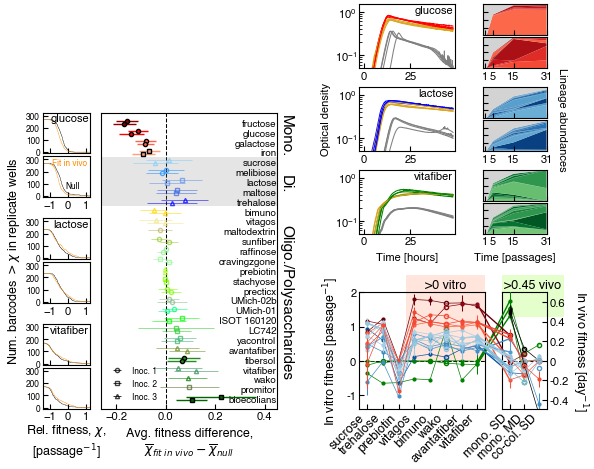

In [11]:
big_fig = plt.figure(figsize=(6.5,5.5))
outer_gs = big_fig.add_gridspec(1, 3, width_ratios=[1, 0.35, 0.8], wspace=0, hspace=0.2)

right_gs = outer_gs[:, 2].subgridspec(6, 3, height_ratios=[0.1, 1, 1, 1, 0.5, 1.7], width_ratios=[1.05,0.3,0.7], wspace=0, hspace=0.2)
OD_col = right_gs[1:-2,0].subgridspec(3, 1, hspace=0.3)
muller_col = right_gs[1:-2,2].subgridspec(3, 1, hspace=0.3)
profile_gs = right_gs[-1, :].subgridspec(nrows=1, ncols=2, width_ratios=[1, 0.35], wspace=0.2)

left_gs = outer_gs[:, 0].subgridspec(2,1, height_ratios=[0.3,1])
vivo_conditioned_gs = left_gs[1].subgridspec(3, 3, height_ratios=[1,1,1], width_ratios=[0.4,0.1,1.5], hspace=0.25, wspace=0.0)


### plot optical densities 
FOCAL_MEDIA = [('glucose', 'red'), ('lactose', 'blue'), ('vitafiber', 'green')]

if 'OD':
    OD_outer_ax = big_fig.add_subplot(OD_col[:])
    OD_outer_ax.set_ylabel('Optical density', labelpad=20)
    util.turn_off_ax(OD_outer_ax)

    for m, (medium, medium_color) in enumerate(FOCAL_MEDIA):
        medium_growth_curves = gc_data
        wells = shared.medium_to_well_map[medium]
        ax = big_fig.add_subplot(OD_col[m])
        # ax.set_title(medium)
        # ax.set_ylabel(medium, color=medium_color, labelpad=10, fontsize=12)
        ax.text(0.98, 0.98, shared.medium_labels[medium], transform=ax.transAxes, fontsize=8, ha='right', va='top')


        for r, (plate_well, bc_set) in enumerate(wells):
            plate = int(plate_well.split('_')[0].strip('p'))
            well = plate_well.split('_')[1]

            # well_growth_curves = growth_curve_dictionary[(plate, well)]

            for (week, passage) in [(1,1),(5, 15),(9, 29)]:
                medium_growth_curves = gc_data[f'plate{plate}_week{week}_passage{passage}']
                times = medium_growth_curves.get('Time (hours)')
                gc = medium_growth_curves.get(well)
                max_time_arg = np.where(np.array(times) <= 48)[0][-1]
                blank_gc = medium_growth_curves.get('A4')


                # growth_curve_dictionary[(plate, 'A4')][week]
                # blank_gcs = [np.median(medium_growth_curves.get(well)[i:i+window]) 
                #     for well in ['A8', 'A12', 'B8', 'B12', 'C8', 'C12', 'D8', 'D12', 'E8', 'E12', 'F8', 'F12','G8', 'G12', 'H8', 'H12']
                #     for i in range(len(medium_growth_curves.get(well))-window)]


                # (times, gc) = well_growth_curves[week]
                # max_time_arg = np.where(np.array(times) <= 48)[0][-1]
                # times, blank_gc = growth_curve_dictionary[(plate, 'A4')][week]

                if r == 0:
                    label = f'Week {week}'
                else:
                    label = ''

                if week == 1:
                    color = 'grey'
                elif week == 5:
                    color = 'goldenrod'
                else:
                    color = medium_color
                ax.plot(times[:max_time_arg], np.array(gc[:max_time_arg]) - np.mean(blank_gc[:max_time_arg]), color=color, label=label)
        # ax.legend(loc=8, frameon=False, fontsize=8)
        ax.set_yscale('log')
        ax.set_xlim(ax.get_xlim()[0], 49)
        ax.set_ylim(5*10**-2, 1.5)
        if m == 2:
            ax.set_xlabel('Time [hours]')


if 'muller':
    ### plot muller plots
    muller_outer_ax = big_fig.add_subplot(muller_col[:])
    muller_outer_ax.yaxis.set_label_position("right")
    muller_outer_ax.set_ylabel('Lineage abundances', labelpad=15, rotation=-90)
    util.turn_off_ax(muller_outer_ax)
    # OD_outer_ax = big_fig.add_subplot(OD_col[:])
    # OD_outer_ax.set_ylabel('Optical density')
    # util.turn_off_ax(OD_outer_ax)
    MULLER_MEDIA = [('glucose', 'Reds'), ('lactose', 'Blues'), ('vitafiber', 'Greens')]
    for m, (medium, muller_colors) in enumerate(MULLER_MEDIA):
        medium_wells = shared.medium_to_well_map[medium]

        well_pairs = [[medium_wells[0][0], medium_wells[2][0], medium_wells[0][1]],
                    [medium_wells[1][0], medium_wells[3][0], medium_wells[1][1]]]

        muller_pair_gs = muller_col[m].subgridspec(2, 1, height_ratios=[1,1], hspace=0.05)

        for col, well_pair in enumerate(well_pairs[:1]):
            well_pair, bc_set = well_pair[:2], well_pair[-1]
            for row, well in enumerate(well_pair):
                well_ax = big_fig.add_subplot(muller_pair_gs[row])

                well_passages, well_reads, well_depths = shared.get_mouse_timecourse('EV', well)
                well_freqs = shared.calc_freqs(well_reads, well_depths)


                large_indices = np.where(np.max(well_freqs, axis=0) > 1e-2)[0]
                ordered_indices, ordered_colors = shared.order_barcodes_by_pool(large_indices, shared.barcode_pool_assignments,
                                                                                [(bc_set, muller_colors)], cg_at_end=True, cg_all_low_freqs=True)

                days, freqs = shared.make_vitro_muller_freqs(well_passages, well_freqs, ordered_indices, 18)
                shared.muller_plot(well_ax, days, ordered_indices, freqs, ordered_colors)

                well_ax.set_ylim(0, 1)
                well_ax.set_xlim(0, 31)
                well_ax.set_yticks([0.25, 0.5, 0.75])
                well_ax.set_yticklabels([])

                well_ax.set_xticks([1, 5, 15, 31])
                if row == 0:
                    well_ax.set_xticklabels([])
                if row == 1 and m == 2:
                    well_ax.set_xlabel('Time [passages]')


### add example barcodes
fit_in_both_count = 0
fit_invitro = 0
if 'barcode profiles':
    media = ['sucrose', 'trehalose', 'prebiotin', 'vitagos', 'bimuno','wako', 'avantafiber', 'vitafiber']
    vivo_ax = big_fig.add_subplot(profile_gs[1])
    vitro_ax = big_fig.add_subplot(profile_gs[0])


    def color_map(in_vitro_fitness, z):
        if in_vitro_fitness <= 0:
            return 'green'

        if in_vitro_fitness > 0.75:
            return mpl.colormaps['Reds'](np.min([1, 0.3+0.75*(in_vitro_fitness-0.75)]))
        else:
            return mpl.colormaps['Blues'](np.min([1, 0.3+(0.75-in_vitro_fitness)]))

    count = 0
    big_count = 0
    def conditioning(idx, fitness_dict):
        SD_fitness = np.mean(fitness_dict['SD'])
        if idx in big_indices[:]:
            return True
        return np.prod([np.min(fitness_dict[m])>0 for m in media[-5:]])

    conditioned_profiles = []

    for idx, fitness_dict in barcode_fitness_map.items():
        vivo_order = ['SD', 'MD', 'comm']
        
        if conditioning(idx, fitness_dict):
            vivo_fitnesses = np.array([np.nanmean(fitness_dict[env]) for env in vivo_order])
            vivo_lower = vivo_fitnesses - np.array([np.nanmin(fitness_dict[env]) for env in vivo_order])
            vivo_upper = np.array([np.nanmax(fitness_dict[env]) for env in vivo_order]) - vivo_fitnesses
            vivo_reps = [np.sum(~np.isnan(fitness_dict[env])) for env in vivo_order]

            vitro_fitnesses =  np.array([np.nanmean(fitness_dict[m]) for m in media])
            vitro_lower = vitro_fitnesses - np.array([np.nanmin(fitness_dict[m]) for m in media])
            vitro_upper = np.array([np.nanmax(fitness_dict[m]) for m in media]) - vitro_fitnesses
            vitro_reps = [np.sum(~np.isnan(fitness_dict[m])) for m in media]

            conditioned_profiles.append( [vivo_fitnesses, vivo_lower, vivo_upper, vitro_fitnesses, vitro_lower, vitro_upper, vivo_reps, vitro_reps] )

            if np.all(vitro_fitnesses[-5:] - vitro_lower[-5:] > 0):
                fit_invitro += 1
                if vivo_fitnesses[0]-vivo_lower[0] > 0:
                    fit_in_both_count += 1
    print("Fit invitro", fit_invitro, "Fit in vivo too", fit_in_both_count)           
        

    # some_profiles = rnd.choice(conditioned_profiles, np.min([100, len(conditioned_profiles)]), replace=False)
    some_profiles = conditioned_profiles
    conditioned_SD_fitnesses = [np.abs(np.median(d[3][:5])-0.75) for d in some_profiles]
    ordering = np.array(conditioned_SD_fitnesses)[::-1]
    sorted_profiles = [d for (SD_fit, d) in sorted(zip(conditioned_SD_fitnesses, some_profiles), key=lambda x:x[0])]
    # sorted_profiles = some_profiles[ordering]


    colors = ['purple', 'blue', 'lightskyblue', 'lightseagreen', 'limegreen', 'darkgreen'][::-1] + ['purple', 'blue', 'lightskyblue', 'lightseagreen', 'limegreen', 'darkgreen'][::-1]
    for z, [vivo_fitnesses, vivo_lower, vivo_upper, vitro_fitnesses, vitro_lower, vitro_upper, vivo_reps, vitro_reps] in enumerate(sorted_profiles):
        offset = 0
        if z == 0: label = ''
        else: label = ''

        mono_SD_fitness = vivo_fitnesses[-1]
        alpha, ls = 1, 'solid'
        if np.abs(mono_SD_fitness) < 0.05:
            alpha, ls=1, 'solid'
    
        color_score = np.median(vitro_fitnesses[-5:], axis=0)

        x_vivo, y_vivo = offset+np.arange(len(vivo_fitnesses)), vivo_fitnesses
        x_vitro, y_vitro = offset+np.arange(len(vitro_fitnesses)), vitro_fitnesses

        if y_vivo[0] > 0.45:
            big_count += 1

        vivo_ax.plot(x_vivo, vivo_fitnesses, color=color_map(color_score, z), linestyle=ls, lw=0.5, alpha=alpha, zorder=1000-z)
        vitro_ax.plot(x_vitro, y_vitro,color=color_map(color_score, z), linestyle=ls, lw=0.5, alpha=alpha, label=label, zorder=1000-z)
        for x, y, ymin, ymax, reps in zip(x_vivo, y_vivo, vivo_lower, vivo_upper, vivo_reps):
            if reps > 1:
                vivo_ax.errorbar(x, y, yerr=([ymin], [ymax]), color=color_map(color_score, z), 
                            marker='o', markersize=2, linestyle=ls, alpha=alpha, zorder=1000-z)
            elif reps == 1:
                vivo_ax.errorbar(x, y, yerr=([ymin], [ymax]), color=color_map(color_score, z), 
                            marker='o', mfc='none', markersize=3, linestyle=ls, alpha=alpha, zorder=1000-z)
                
        for x, y, ymin, ymax, reps in zip(x_vitro, y_vitro, vitro_lower, vitro_upper, vitro_reps):
            if reps > 1:
                vitro_ax.errorbar(x, y, yerr=([ymin], [ymax]), color=color_map(color_score, z), 
                            marker='o', markersize=2, linestyle=ls, alpha=alpha, zorder=1000-z)
            elif reps == 1:
                vitro_ax.errorbar(x, y, yerr=([ymin], [ymax]), color=color_map(color_score, z), 
                            marker='o', mfc='none', markersize=3, linestyle=ls, alpha=alpha, zorder=1000-z)
                
        # vitro_ax.errorbar(x_vitro, y_vitro, yerr=(vitro_lower, vitro_upper), color=color_map(color_score, z), 
        #                   marker='o', markersize=3, linestyle=ls, alpha=alpha, label=label, zorder=1000-z)

        if ~np.isnan(y_vivo[0]) and ~np.isnan(y_vitro[0]):
            connector = mpl.patches.ConnectionPatch((x_vivo[0], y_vivo[0]), (x_vitro[-1], y_vitro[-1]), 
                                        coordsA="data", coordsB="data", 
                                        axesA=vivo_ax, axesB=vitro_ax, color=color_map(color_score, z), 
                                        linestyle=ls, alpha=alpha, clip_on=False, zorder=1000-z)
            vitro_ax.add_artist(connector)

    print("very fit in vivo:", big_count)
    vitro_ax.set_ylabel('In vitro '+r'fitness [passage$^{-1}$]', fontsize=9)
    vitro_ax.axhline(0, color='black', linestyle='dashed')
    vitro_ax.set_xlim(-0.5, len(media)-1+0.5)
    vitro_min, vitro_max = -1.4, 2
    vitro_ax.set_ylim(vitro_min, vitro_max)
    # vitro_ax.axvspan(2.5, vitro_ax.get_xlim()[1], ymin=-vitro_ax.get_ylim()[0]/(np.diff(vitro_ax.get_ylim())), color='goldenrod', lw=0, alpha=0.2, label='Condition on\npositive fitness')
    vitro_ax.set_xticks(np.arange(len(media)))
    vitro_ax.set_xticklabels(media, fontsize=9, rotation=45, ha='right')
    vitro_ax.legend(loc=4, frameon=False, fontsize=8)
    vitro_ax.axvspan(2.5, vitro_ax.get_xlim()[1], ymin=-vitro_ax.get_ylim()[0]/(np.diff(vitro_ax.get_ylim()))[0], ymax=1.15, color='coral', lw=0, alpha=0.2, clip_on=False)
    vitro_ax.text((2.5+vitro_ax.get_xlim()[1])/2, 2.03, '>0 vitro', va='bottom', ha='center', fontsize=9)
    vitro_ax.set_yticks([-1, 0, 1, 2])
    vitro_ax.set_yticklabels([-1, 0, 1, 2], fontsize=8)

    vivo_ax.axhline(0, color='black', linestyle='dashed')
    vivo_ax.set_ylabel('In vivo '+r'fitness [day$^{-1}$]', fontsize=9, rotation=-90, labelpad=15)
    vivo_ax.set_ylim(-0.7*(np.abs(vitro_min)/vitro_max), 0.7)
    vivo_ax.set_xticks([0, 1, 2])
    vivo_ax.set_xlim(-0.5, 2.5)
    # vivo_ax.axvspan(1.5, 3, ymin=-vivo_ax.get_ylim()[0]/(np.diff(vivo_ax.get_ylim())), color='goldenrod', lw=0, alpha=0.2)
    vivo_ax.set_yticks([-0.4, -0.2, 0, 0.2, 0.4, 0.6])
    vivo_ax.set_yticklabels([-0.4, -0.2, 0, 0.2, 0.4, 0.6], fontsize=8)
    vivo_ax.yaxis.tick_right()
    vivo_ax.yaxis.set_label_position("right")
    vivo_ax.set_xticklabels(['mono. SD', 'mono. MD', 'co-col. SD'], fontsize=9, rotation=45, ha='right')
    # vivo_ax.axvspan(vivo_ax.get_xlim()[0], 0.5, ymin=(0.45-vivo_ax.get_ylim()[0])/(np.diff(vivo_ax.get_ylim()))[0], ymax=1, color='lawngreen', lw=0, alpha=0.2, clip_on=False)
    vivo_ax.axvspan(vivo_ax.get_xlim()[0], vivo_ax.get_xlim()[1]+1.2, ymin=(0.45-vivo_ax.get_ylim()[0])/(np.diff(vivo_ax.get_ylim()))[0], ymax=1.15, color='lawngreen', lw=0, alpha=0.2, clip_on=False)
    vivo_ax.text(vivo_ax.get_xlim()[0]+0.1, 0.71, '>0.45 vivo', va='bottom', ha='left', fontsize=9)

#####
if 'vivo_conditioned_ax':
    FOCAL_MEDIA = [('glucose', 'red'), ('lactose', 'blue'), ('vitafiber', 'green')]
    cumulative=-1
    binspace = np.linspace(-3,3,601)
    # binspace = np.linspace(-3,3,61)
    example_gs_outer = big_fig.add_subplot(vivo_conditioned_gs[:, 0])
    util.turn_off_ax(example_gs_outer)
    example_gs_outer.set_ylabel('Num. barcodes $>\chi$ in replicate wells', fontsize=9, labelpad=15)
    example_gs_outer.set_xlabel('Rel. fitness, $\chi$,\n[passage$^{-1}$]', fontsize=9, labelpad=10)

    for m, (medium, color) in enumerate(FOCAL_MEDIA):
        example_gs = vivo_conditioned_gs[m, 0].subgridspec(2, 1, height_ratios=[1,1], hspace=0.075)

        for row, (vivo_conditioned_lfc, null_lfc) in enumerate(medium_vivo_null_distributions[medium]):
            plot_vitro_cum_ax = big_fig.add_subplot(example_gs[row])
            null_density, bins, _ = plot_vitro_cum_ax.hist(null_lfc, bins=binspace, cumulative=cumulative, histtype='step',
                            color='black', label=f'Null', lw=0.25)
            emp_density, bins, _ = plot_vitro_cum_ax.hist(vivo_conditioned_lfc, bins=binspace, cumulative=cumulative, histtype='step',
                            color='darkorange', label=f'Fit in vivo', lw=0.25)
            plot_vitro_cum_ax.set_ylim(-10, 325)
            plot_vitro_cum_ax.set_yticks([0,100, 200, 300])
            plot_vitro_cum_ax.set_yticklabels([0,100, 200, 300], fontsize=6)
            plot_vitro_cum_ax.set_xlim(-1.4, 1.2)

            if row == 0:
                # plot_vitro_cum_ax.set_title(medium, fontsize=12, color=color)
                plot_vitro_cum_ax.text(0.98, 0.98, medium, transform=plot_vitro_cum_ax.transAxes, fontsize=8, ha='right', va='top')
                plot_vitro_cum_ax.set_xticklabels([])
            if m == 0 and row==1:
                plot_vitro_cum_ax.text(0.2, 0.95, "Fit in vivo", transform=plot_vitro_cum_ax.transAxes, color='darkorange', fontsize=6, ha='left', va='top')
                plot_vitro_cum_ax.text(0.48, 0.4, "Null", transform=plot_vitro_cum_ax.transAxes, color='black', fontsize=6, ha='left', va='top')


    #### Summary plot ###

    ordered_media = shared.ordered_media

    FOCAL_MEDIA_COLOR = {'glucose': 'red', 'lactose': 'blue', 'vitafiber':'green'}

    medium_deltas = {}
    medium_pvals = []
    for m, medium in enumerate(ordered_media):
        well_data = [(data[0], data[1]) for key, data in bootstrapped_data[medium].items()]
        medium_deltas[medium] = np.mean([np.mean(data[0])-np.mean(data[1]) for key, data in bootstrapped_data[medium].items()])
        if np.isnan(medium_deltas[medium]):
            medium_deltas[medium] = -np.inf
        # print([(medium, len(vivo), len(null), vivo, null) for vivo, null in well_data])
        # pvals = [scipy.stats.ttest_ind(vivo, null, equal_var=False)[1] for (vivo, null) in well_data]
        pvals = [scipy.stats.ttest_rel(vivo, null, nan_policy='omit')[1] for (vivo, null) in well_data]
        score, pval = scipy.stats.combine_pvalues(pvals)
        medium_pvals.append( [medium, pval] )

    medium_pvals.sort(key=lambda x:x[1])
    print(medium_pvals)
    # medium_pvals2 = [(medium, p_adj) for medium, p_adj in zip(ordered_media, scipy.stats.false_discovery_control([p for (medium, p) in medium_pvals]))]
    medium_pval_sorting = {medium: [i+1, pval] for i, [medium, pval] in enumerate(medium_pvals)}


    bc_set_markers = {'V1':'o', 'V2':'s', 'V3':'^'}
    sorted_media = []
    MONOSACH_COLORS = ['darkred', 'red', 'tomato', 'lightsalmon'][::-1]
    DISACCH_COLORS = ['lightskyblue', 'dodgerblue', 'cornflowerblue', 'royalblue', 'blue'][::-1]
    POLY_COLORS = ['gold','khaki',  'darkkhaki', 'yellowgreen', 'lightgreen', 'palegreen',
                   'greenyellow', 'chartreuse', 'lawngreen', 'darkseagreen',
                   'springgreen', 'lime', 'limegreen', 'mediumseagreen', 'olivedrab', 
                  'forestgreen', 'seagreen', 'green','darkolivegreen','darkgreen'][::-1]

    for medium_groups in [shared.MONOSACCHARIDES,
                        shared.DISACCHARIDES,
                        shared.OLIGOSACCHARIDES+
                        shared.POLYSACCHARIDES]:
        sub_media = [(delta, medium) for medium, delta in medium_deltas.items() if medium in medium_groups]
        for (delta, medium) in sorted(sub_media):
            sorted_media.append(medium)

    ax = big_fig.add_subplot(vivo_conditioned_gs[:, 2])

    for m, medium in enumerate(sorted_media):
        sorting, pval = medium_pval_sorting[medium]
        color = rnd.choice(KELLY_COLORS) if medium not in FOCAL_MEDIA_COLOR else FOCAL_MEDIA_COLOR[medium]

        if medium in shared.MONOSACCHARIDES:
            color = MONOSACH_COLORS.pop()
        elif medium in shared.DISACCHARIDES:
            color = DISACCH_COLORS.pop()
        elif medium in shared.OLIGOSACCHARIDES+shared.POLYSACCHARIDES:
            color = POLY_COLORS.pop()
        print(color)

        for key, [vivo_lfc, null_lfc, fitness_deltas, bc_set] in bootstrapped_data[medium].items():
            mean, std = np.mean(fitness_deltas), np.std(fitness_deltas)
            marker = bc_set_markers[bc_set]
            # color = rnd.cKELLY_COLORS[m%len(KELLY_COLORS)] if medium not in FOCAL_MEDIA_COLOR else FOCAL_MEDIA_COLOR[medium]
            

            if pval < 0.05 * sorting / len(medium_pval_sorting):
                alpha = 1
                ax.errorbar([mean], [m+(key-0.5)*0.3], xerr=2*std, lw=1, marker=marker,markersize=3, mec='black', color=color)

            else:
                alpha = 0.75
                ax.errorbar([mean], [m+(key-0.5)*0.3], xerr=2*std, lw=0.5, marker=marker,markersize=3, mfc='none', alpha=alpha, color=color)



    ax.set_xlabel("Avg. fitness difference,\n" + "$\overline{\chi}_{fit~in~vivo} -\overline{\chi}_{null}$", fontsize=9)
    ax.axvline(0, color='black', linestyle='dashed', zorder=0)
    ax.axhspan(3.5, 8.5, color='grey', alpha=0.2, lw=0)
    # ax.text(0.98, 0.95, 'Monosacch.', transform=ax.transAxes, fontsize=10, va='top', ha='right')
    # ax.text(0.98, 0.80, 'Disacch.', transform=ax.transAxes, fontsize=10, va='top', ha='right', color='black')
    # ax.text(0.98, 0.45, 'Oligo/poly\nsacch.', transform=ax.transAxes, fontsize=10, va='top', ha='right')
    ax.set_yticks(np.arange(len(sorted_media)))
    ax.set_yticklabels([m for m in sorted_media], fontsize=7, ha='right', zorder=1000)
    ax.tick_params(axis="y", pad=-.5, width=0)
    ax.set_ylim(-1, 29)
    ax.invert_yaxis()
    ax.yaxis.tick_right()
    # ax.arrow(0.05, 1.02, 0.9, 0, transform=ax.transAxes, width=0.003, head_width=0.015, head_length=0.03, color='black', clip_on=False)
    # ax.arrow(.95, 1.02, -0.9, 0, transform=ax.transAxes, width=0.003, head_width=0.015, head_length=0.03, color='black', clip_on=False)
    # ax.text(0, 1.03, 'Anti-correlated', transform=ax.transAxes, fontsize=9, va='bottom', ha='left')
    # ax.text(1, 1.03, 'Correlated', transform=ax.transAxes, fontsize=9, va='bottom', ha='right')
    ax.text(1.05, 0.85, 'Mono.', transform=ax.transAxes, fontsize=11, va='bottom', ha='center', rotation=-90)
    ax.text(1.05, 0.73, 'Di.', transform=ax.transAxes, fontsize=11, va='bottom', ha='center', rotation=-90)
    ax.text(1.05, 0.1, 'Oligo./Polysaccharides', transform=ax.transAxes, fontsize=11, va='bottom', ha='center', rotation=-90)

    legend_markers, legend_labels = [],[]
    # legend_ax.set_ylim([0, 1])
    # util.turn_off_ax(legend_ax)
    for marker, label in zip(['o', 's', '^'], ['Inoc. 1', 'Inoc. 2', 'Inoc. 3']):
        legend_markers.append(plt.errorbar([1], [-1], xerr=1/2, marker=marker, mfc='none', markersize=3, alpha=0.75, ls='none', color='black', label=label))
        legend_labels.append(label)
    # ax.set_xlim(-0.18, 0.35)
    ax.set_xlim(-0.26, 0.45)
    ax.legend(legend_markers, legend_labels, ncol=1, loc=3, fontsize=6, frameon=False)


plt.rcParams['svg.fonttype'] = 'none'
big_fig.savefig(f'../figures/fig7_invitro_3mmedia.svg', bbox_inches='tight', transparent=True)
big_fig.savefig(f'../figures/fig7_invitro_3mmedia.pdf', bbox_inches='tight', transparent=True)